### I took some time to go through the data and figure out how we can work with it in python, if you see any errors or encounter any errors let me know, and we can figure them out togother. I tried adding comments that would make it easier to follow my work.

### Most of this exploration notebook was dervied from a few different sources:
#### 1. The youtuber "sentdex" created a video series playlist (check out episodes 2 & 3) that detailed a first pass for the 2017 data science bowl (also hosted on kaggle). This project had more do do with predicting lung cancer but I feel these tutorials are great for learning about how to work with the dicom files.
#### 2. The full preprocessing tutorial for the Data Science Bowl 2017 includes great information on more advanced processing of the dicom files and will probably be necessary later on in the project, for now I tried to keep things simple in the code below.
#### 3. Pulmonary Dicom Preprocessing notebook for our project on kaggle, while the two previous sources are great for working with dicom files, that project was based around binary classification ("Cancer" or "No Cancer") and ours seem to have a few more variables we will have to consider.

### Sources
#### 1. https://www.youtube.com/watch?v=ulq9DjCJPDU&list=PLQVvvaa0QuDd5meH8cStO9cMi98tPT12_
#### 2. https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial
#### 3. https://www.kaggle.com/allunia/pulmonary-dicom-preprocessing

### Dont forget, you'll need to install the following packages to work with these files
#### For those using Pip:
##### pip install jupyter, matplotlib, pydicom

#### For those working in an anaconda environment, I think you'll only need pydicom

##### conda install pydicom

##### note: if you are working with virtual enviroments it will be: conda install pydicom environment_name

 

In [1]:
import matplotlib # for visualizing the Dicom files
import pydicom    # for getting info/ managing the dicom files
import os         # for directrory operations and file management
import matplotlib.pyplot as plt #also for visualizing

In [2]:
data_dir = 'F:/OISC/osic-pulmonary-fibrosis-progression/train/' # where my dicom images are stored (had to use forward slash or I had issues - also don't forget forward slash at the end)
patients = os.listdir(data_dir) # creates a list of all folders in the directory effectivly creating a list of patients


In [3]:
print(f'Total # of patients: {len(patients)}')

Total # of patients: 176


### Creating a visual of our first patient (P1)

In [4]:
P1 = patients[1] # select first patient
P1 # see unique ID of patient

'ID00009637202177434476278'

In [5]:
path = data_dir + P1 
path #the path of where patient 1's dicom files are stored

'F:/OISC/osic-pulmonary-fibrosis-progression/train/ID00009637202177434476278'

In [6]:
slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)] 
slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
'''What the above does: 
            1. gets a list of all of the dicom files in patient 1's foler
            2. reads each file with the pydicom package (as you'll see below each file has important attributes)
            3. appends the attributes for each to a list called slices'''

'''Lets take a look at the information associated with the first item in the slices list which is also
    the information for the file "D:\osic-pulmonary-fibrosis-progression\train\ID00007637202177411956430\1.dcm"
    (our first dicom file for patient 1)'''

#slices[14].pixel_array[400]
slices[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.0.37492.1591423153.182588
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: ['ISO 2022 IR 100', 'ISO 2022 IR 100']
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.0.37492.1591423153.182588
(0008, 0060) Moda

#### As we can see above there is a significant amount of data associated with each file and not all of it is really important (who cares about the Manufacturer, etc)

#### Some things that are going to be important are the len(slices) and the attributes "Rows", "Columns" (which can also be expressed as slices[0].pixel_array.shape)


In [14]:
#Lets take a look at the attributes meantioned above for our patient 1
print(len(slices), slices[0].pixel_array.shape)

#what the below output shows is that we have a 512 px by 512 px with 30 slices



394 (768, 768)


(768, 768)

In [15]:
%%time 
#I am curious to see how long it will take to process the code below... ignore this


#Lets take a look and see if our first 10 patients all have the same dimensions, I made a for loop
# with some of the code seen earlier to get the dimensions.

for patient in patients[:15]:

    path = data_dir + patient #seen earlier
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)] #seen earlier
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2])) # **see below
    print(len(slices), slices[0].pixel_array.shape, patient) #seen earlier

    
# **That lamba funtion sorts the dicom images in the proper order, apperently they are not in order.
# Also I am not really an expert on lambda functions and they are confusing to me... but it works
# I got that from sentdex but the original code didn't work and I had to add float (found by researching).

30 (512, 512) ID00007637202177411956430
394 (768, 768) ID00009637202177434476278
106 (512, 512) ID00010637202177584971671
49 (512, 512) ID00012637202177665765362
31 (843, 888) ID00014637202177757139317
295 (768, 768) ID00015637202177877247924
29 (512, 512) ID00019637202178323708467
493 (512, 512) ID00020637202178344345685
27 (512, 512) ID00023637202179104603099
24 (768, 768) ID00025637202179541264076
358 (768, 768) ID00027637202179689871102
433 (512, 512) ID00030637202181211009029
205 (512, 512) ID00032637202181710233084
574 (512, 512) ID00035637202182204917484
346 (768, 768) ID00038637202182690843176
Wall time: 17.2 s


#### While it is not a problem now, our data will later have to be resized so that all patients have similar sized dicom datasets, perhaps something like  30 (50,50)   (30 slices that are 50 px by 50 px) but lets figure that out later and move on to the fun part: visualizing.

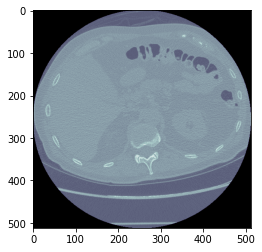

In [10]:
# we will essentially use the same code as above but with a few more lines, again lets look only at patient 1.
for patient in patients[:1]:
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    plt.imshow(slices[0].pixel_array, cmap = "bone")
    plt.show()
# intersting... I am definatly not a doctor because idk what I am looking at
# Lets plot the other images

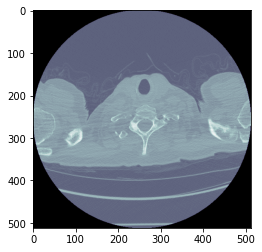

In [15]:
#lets look at the last slice for patient 1
for patient in patients[:1]:
    path = data_dir + patient
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2])) # * see below
    plt.imshow(slices[-1].pixel_array, cmap = "bone")
    plt.show()
    

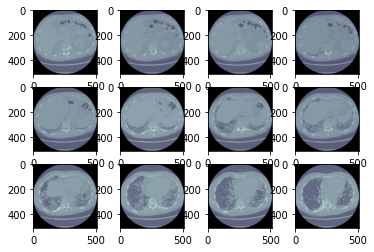

In [12]:
#the below will plot several of the slices at once
# the color doesn't really matter, I just forgot to add cmap = "gray" in plt.imshow()

fig = plt.figure()
for num, each_slice in enumerate(slices[:12]): # I would plot all but apparently matplotlib can only do 12
    y = fig.add_subplot(3,4, num+1)
    y.imshow(each_slice.pixel_array, cmap = 'bone')
plt.show()
#well they definatly look different...
# the ones on the bottom seem to looks kind of like lungs

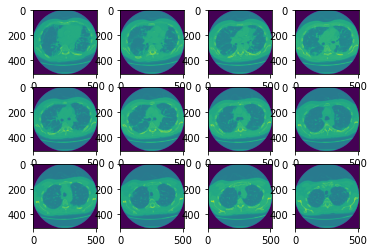

In [12]:
# plotting the next 12 images
fig = plt.figure()
for num, each_slice in enumerate(slices[12:24]): # I would plot all but apparently matplotlib can only do 12
    y = fig.add_subplot(3,4, num+1)
    y.imshow(each_slice.pixel_array)
plt.show() 
# Looks more like lungs to me

### We have a good idea of how to do some basic operations on our dicom files, there is much more that can be done to the files but for now lets take a look at the patient data.

#### To do this we will neee a few more packages: pandas and numpy. These are more than likely already installed if you are using an anaconda enviroment, but if you are not see the instructions at the beginning where we installed other packages.

#### Pandas is a very powerful and popular package for data analysis and manipulation, it also has create documentation.
#### Numpy is a very popular package for high level mathmatics - although we will only be useing it to calculate the slope for now.

In [13]:
import os
import pandas as pd
import numpy as np

#### We will first begin by reading our csv file with pandas

In [14]:
df = pd.read_csv('F:/OISC/osic-pulmonary-fibrosis-progression/train.csv')

#### Display some basic information

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [16]:
df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [17]:
#figure out total number of patients in dataframe
len(df['Patient'].unique())

176

In [18]:
#craete a dataframe with only patient information
# the below line of code selects certain columns from df and creates a new df with them
df_patient = df[['Patient', 'Age', 'Sex', 'SmokingStatus']]
df_patient.head()

,Patient,Age,Sex,SmokingStatus
0,ID00007637202177411956430,79,Male,Ex-smoker
1,ID00007637202177411956430,79,Male,Ex-smoker
2,ID00007637202177411956430,79,Male,Ex-smoker
3,ID00007637202177411956430,79,Male,Ex-smoker
4,ID00007637202177411956430,79,Male,Ex-smoker


In [19]:
#each patient had multiple entries and we are left with a dataframe that has duplicates
#we need to drop these duplicate rows before we can get valuable information about our patients
df_patient = df_patient.drop_duplicates()
df_patient

,Patient,Age,Sex,SmokingStatus
0,ID00007637202177411956430,79,Male,Ex-smoker
9,ID00009637202177434476278,69,Male,Ex-smoker
18,ID00010637202177584971671,60,Male,Ex-smoker
27,ID00011637202177653955184,72,Male,Ex-smoker
36,ID00012637202177665765362,65,Male,Never smoked
...,...,...,...,...
1504,ID00419637202311204720264,73,Male,Ex-smoker
1513,ID00421637202311550012437,68,Male,Ex-smoker
1523,ID00422637202311677017371,73,Male,Ex-smoker
1531,ID00423637202312137826377,72,Male,Ex-smoker


In [20]:
df_patient.info() # this matches our unique patient amount that we found earlier

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 1540
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Patient        176 non-null    object
 1   Age            176 non-null    int64 
 2   Sex            176 non-null    object
 3   SmokingStatus  176 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.9+ KB


In [21]:
#lets see some demogrphics of our patients
df_age = pd.DataFrame(df_patient['Age'].value_counts(sort = False))
df_age
#above we counted the occurance of each age and created a dataframe

,Age
49,1
51,1
52,2
53,1
54,2
55,3
56,5
57,3
58,7
59,1


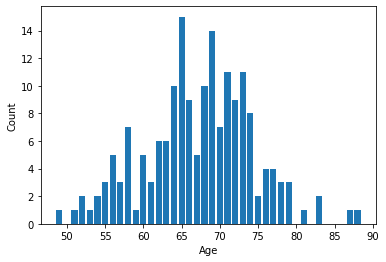

In [22]:
#lets plot the above
import matplotlib.pyplot as plt

x = df_age.index #we could have renamed this to something more accurate like "Age"
y = df_age['Age'] #pandas does wierd things when creating a dataframe, we could have renamed it, this should actually be the counts

# name our axis
plt.xlabel("Age") 
plt.ylabel("Count")

#plot it
plt.bar(x, y)
plt.show()

<BarContainer object of 3 artists>

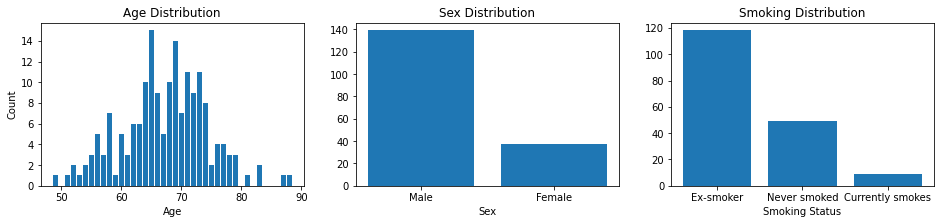

In [23]:
#it may be useful to omit our outliers like those older than 80 and those younger than 50
#if we had a larger dataset we could even bin our data set and train a model for each age group
#but this data set is extrmely small

#lets also plot sex and smoking status ina similar fasion and show everthing side by side

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,3))
df_sex = pd.DataFrame(df_patient['Sex'].value_counts())
df_smoke = pd.DataFrame(df_patient['SmokingStatus'].value_counts())


x = df_age.index 
y = df_age['Age'] 
ax1.set_title("Age Distribution")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")
ax1.bar(x, y)




x = df_sex.index 
y = df_sex['Sex']
ax2.set_title("Sex Distribution")
ax2.set_xlabel("Sex")
ax2.bar(x, y)



x = df_smoke.index 
y = df_smoke['SmokingStatus']
ax3.set_title("Smoking Distribution") 
ax3.set_xlabel("Smoking Status")
ax3.bar(x, y)




#### A rant about the medical field and AI: The above graphs indicate some interesting information. First we can see that there are more than double the amount of males in this data set. In this case, its not an issue, a quick google search reveals that pulmonary fibrosis is more prevalant in men (see source1). But lets say the condition was equally prevelant in males and females then this could potentially effect our model where it more accuratly predicts the FVC value in males than in females. Does this mean males would recieve better care if we use our model? This type of issue has somewhat become an ethical topic in the world of artificial inteligence in general (see source2). Bias is an important factor when creating prediction models.

##### source1: https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690#:~:text=Pulmonary%20fibrosis%20is%20a%20lung,progressively%20more%20short%20of%20breath.

##### source2: https://thenextweb.com/contributors/2018/10/27/4-human-caused-biases-machine-learning/#:~:text=Sample%20bias,data%20it%20could%20interact%20with.

#### Now that we have a decent idea of the demographics of our dataset, lets revisit our initial data frame and get an idea some information reguarding each patient, the amount of visits and where they fall in terms of their FVC comapared to others their age (percent)

In [24]:
df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [25]:
#lets first find the number of visits for each patient and frequcy distributions of visits
df.Patient.value_counts() # note that this line of code is the same as df['Patient'].value_counts() 

ID00167637202237397919352    10
ID00400637202305055099402    10
ID00119637202215426335765    10
ID00105637202208831864134    10
ID00421637202311550012437    10
                             ..
ID00128637202219474716089     7
ID00186637202242472088675     7
ID00344637202287684217717     7
ID00267637202270790561585     6
ID00047637202184938901501     6
Name: Patient, Length: 176, dtype: int64

In [26]:
#lets turn this into a dataframe and get the value counts for the visits of each patient
df_visits = df.Patient.value_counts().rename_axis('Patient').to_frame('Count')
#the code above does a few things for us all at once, earlier when 
#plotting i mentioned "#pandas does wierd things when creating a dataframe"
#the above renames the index axis, turns this into a dataframe and lets us name our last column

 
df_visits

,Count
Patient,
ID00167637202237397919352,10
ID00400637202305055099402,10
ID00119637202215426335765,10
ID00105637202208831864134,10
ID00421637202311550012437,10
...,...
ID00128637202219474716089,7
ID00186637202242472088675,7
ID00344637202287684217717,7


In [27]:
#then create another dataframe so that we can graph it... there has to be a better way of doing this
df_counts = df_visits.value_counts(sort = False).rename_axis('visit_counts').to_frame("Count").reset_index()
#after a while of troubleshooting, that reset_index is needed if you want this to plot...
df_counts

,visit_counts,Count
0,6,2
1,7,7
2,8,25
3,9,132
4,10,10


#### As we can see above, a decent amount of people visisted about 9 times

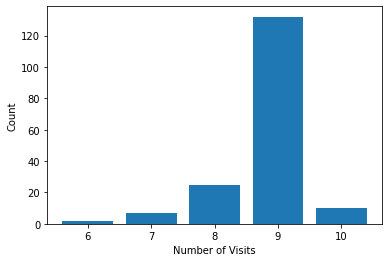

In [28]:
#time to graph
x = df_counts['visit_counts'] 
y = df_counts['Count']

# name our axis
plt.xlabel("Number of Visits") 
plt.ylabel("Count")

#plot it
plt.bar(x, y)
plt.show()

In [29]:
#what else should we take a look at
df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [30]:
#lets somehow plot people first visit
# lets try using a groupby
df.groupby('Patient')['Weeks'].min()



Patient
ID00007637202177411956430    -4
ID00009637202177434476278     8
ID00010637202177584971671     0
ID00011637202177653955184     6
ID00012637202177665765362    33
                             ..
ID00419637202311204720264     6
ID00421637202311550012437    15
ID00422637202311677017371     6
ID00423637202312137826377    17
ID00426637202313170790466     0
Name: Weeks, Length: 176, dtype: int64

#### Groupbys are very powerful here are a few examples

In [31]:
#gets min value for each patient from the rows associated with that patient
df.groupby('Patient').min().head()

,Weeks,FVC,Percent,Age,Sex,SmokingStatus
Patient,,,,,,
ID00007637202177411956430,-4,2000,50.327126,79,Male,Ex-smoker
ID00009637202177434476278,8,3214,74.890484,69,Male,Ex-smoker
ID00010637202177584971671,0,2474,66.519682,60,Male,Ex-smoker
ID00011637202177653955184,6,3193,82.549121,72,Male,Ex-smoker
ID00012637202177665765362,33,2971,81.468685,65,Male,Never smoked


In [32]:
#gets max value for each patient from the rows associated with that patient
df.groupby('Patient').max().head()

,Weeks,FVC,Percent,Age,Sex,SmokingStatus
Patient,,,,,,
ID00007637202177411956430,57,2315,58.253649,79,Male,Ex-smoker
ID00009637202177434476278,60,3895,90.758691,69,Male,Ex-smoker
ID00010637202177584971671,54,3523,94.724672,60,Male,Ex-smoker
ID00011637202177653955184,58,3541,91.546019,72,Male,Ex-smoker
ID00012637202177665765362,87,3759,103.076670,65,Male,Never smoked


In [33]:
#gets average value for each patient over all rows associated with that patient
df.groupby('Patient').mean().head()

,Weeks,FVC,Percent,Age
Patient,,,,
ID00007637202177411956430,19.111111,2113.888889,53.192977,79.0
ID00009637202177434476278,24.000000,3596.666667,83.807127,69.0
ID00010637202177584971671,16.111111,3037.111111,81.660333,60.0
ID00011637202177653955184,22.000000,3387.000000,87.564633,72.0
ID00012637202177665765362,49.777778,3348.777778,91.827843,65.0


In [34]:
df.groupby('Patient')['Weeks'].min() #notice how we specified a specific column

Patient
ID00007637202177411956430    -4
ID00009637202177434476278     8
ID00010637202177584971671     0
ID00011637202177653955184     6
ID00012637202177665765362    33
                             ..
ID00419637202311204720264     6
ID00421637202311550012437    15
ID00422637202311677017371     6
ID00423637202312137826377    17
ID00426637202313170790466     0
Name: Weeks, Length: 176, dtype: int64

In [35]:
df_first_visit = df.groupby('Patient')['Weeks'].min().reset_index() #reset_index cleans things up and turns it into a datarame
df_first_visit

,Patient,Weeks
0,ID00007637202177411956430,-4
1,ID00009637202177434476278,8
2,ID00010637202177584971671,0
3,ID00011637202177653955184,6
4,ID00012637202177665765362,33
...,...,...
171,ID00419637202311204720264,6
172,ID00421637202311550012437,15
173,ID00422637202311677017371,6
174,ID00423637202312137826377,17


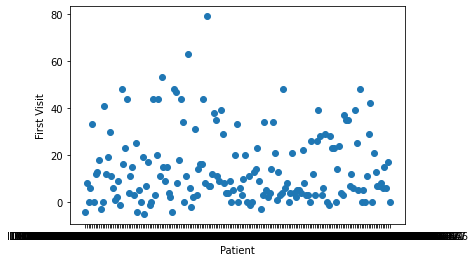

In [36]:
x = df_first_visit['Patient'] 
y = df_first_visit['Weeks']

plt.xlabel("Patient") 
plt.ylabel("First Visit")


plt.scatter(x, y)
plt.show()

#the below is concerning because it looks liek someones first visit was after 80 weeks

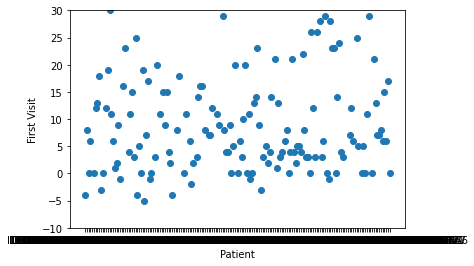

In [37]:
x = df_first_visit['Patient'] 
y = df_first_visit['Weeks']

plt.xlabel("Patient") 
plt.ylabel("First Visit")

plt.ylim(-10,30) #lets set an axis limit

plt.scatter(x, y)
plt.show()




#### There is proabbly more that we can do in terms of data analysis but lets get into preprocessing our data and getting it into some sort of nural network this will be found in another notebook